# Comparing Model Results

In [1]:
from BPTK_Py.config import matplotlib_rc_settings

configuration = {"matplotlib_rc_settings" :matplotlib_rc_settings}

configuration["matplotlib_rc_settings"]["font.family"]="Marydale, DejaVu Sans"

from BPTK_Py.bptk import bptk 

bptk = bptk(configuration=configuration)

ERROR:root:Equation 'brewery.sending_orders' not found!


2021-11-18 19:31:26.082393, [ERROR] No simulation model containing equation "brewery.actualProduction". Did you maybe mean one of "brewery.order_decision, brewery.total_stock, brewery.naive_order_decision"?
2021-11-18 19:31:26.149796, [ERROR] No simulation model containing equation "brewery.sending_orders". Did you maybe mean one of "brewery.sendingOrders, brewery.makingOrders, brewery.incomingOrders"?


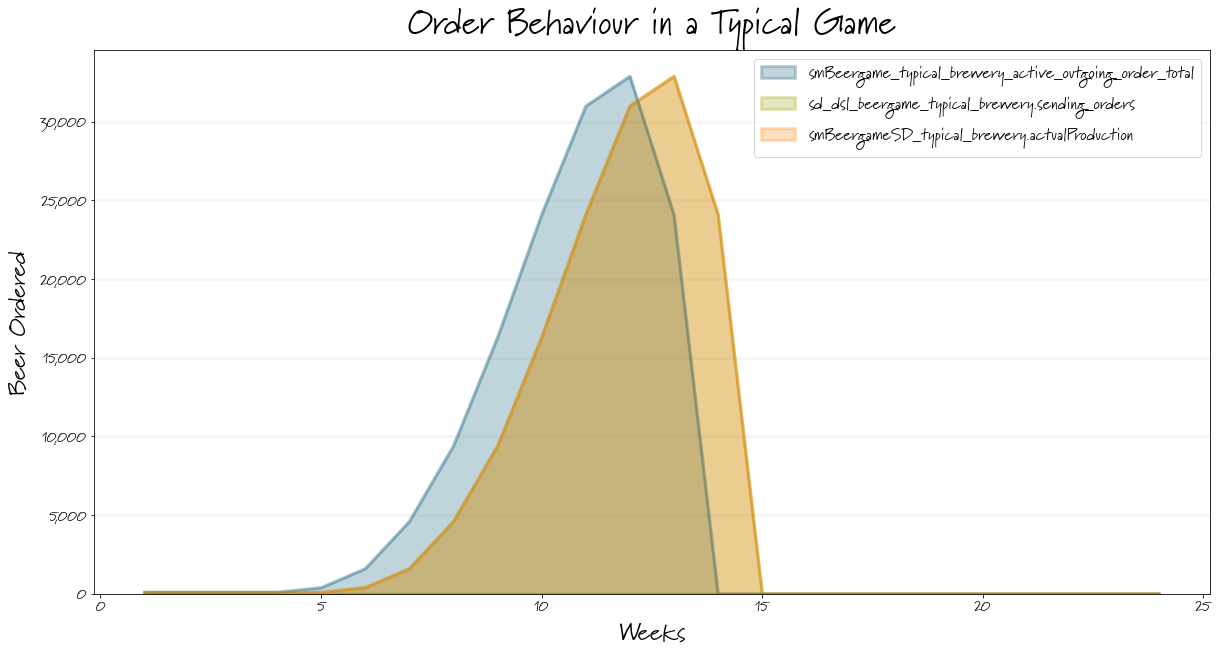

In [2]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD","sd_dsl_beergame","smBeergame"],
    kind="area",
    scenarios=["typical"],
    title="Order Behaviour in a Typical Game",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["brewery.actualProduction","brewery.sending_orders"],
      agents=["brewery"],
     agent_states=["active"],
    agent_properties=["outgoing_order"],
    agent_property_types=["total"]
    
)

ERROR:root:Equation 'consumer.sending_orders' not found!


2021-11-18 19:31:26.548749, [ERROR] No simulation model containing equation "retailer.incomingOrder". Did you maybe mean one of "retailer.incoming_orders, retailer.incoming_order_rate, retailer.outgoing_orders"?
2021-11-18 19:31:26.608282, [ERROR] No simulation model containing equation "consumer.sending_orders". Did you maybe mean one of "wholesaler.sendingOrders, brewery.sendingOrders, distributor.sendingOrders"?


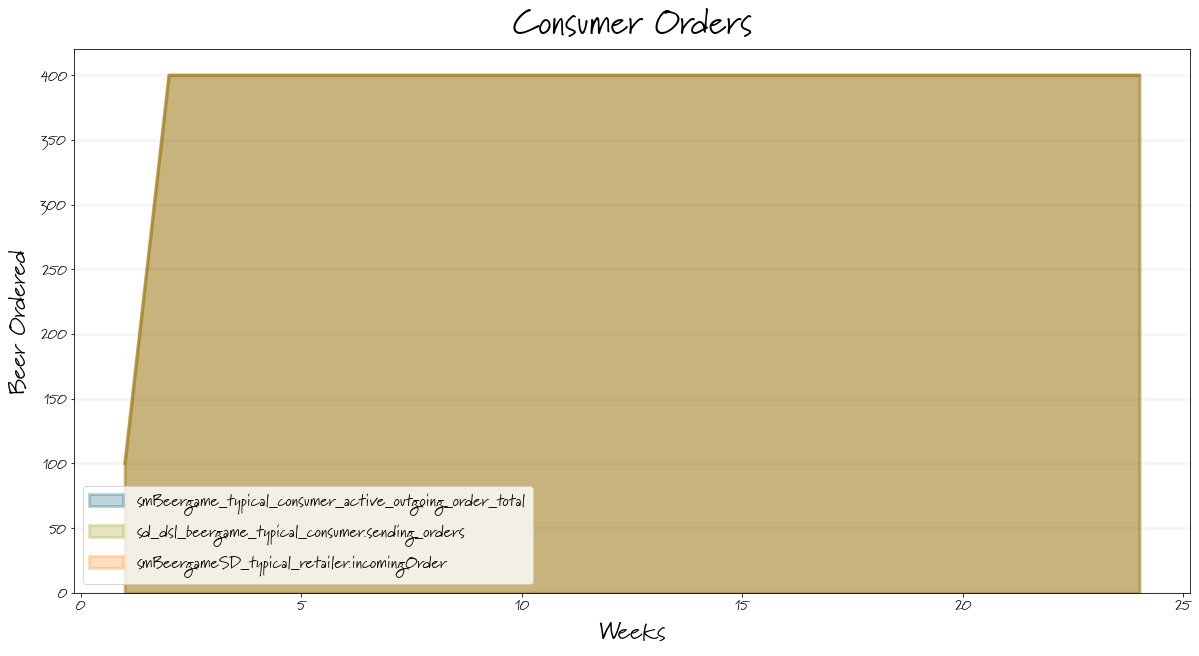

In [3]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD","sd_dsl_beergame","smBeergame"],
    kind="area",
    scenarios=["typical"],
    title="Consumer Orders",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["retailer.incomingOrder","consumer.sending_orders"],
     agents=["consumer"],
     agent_states=["active"],
    agent_properties=["outgoing_order"],
    agent_property_types=["total"]
)

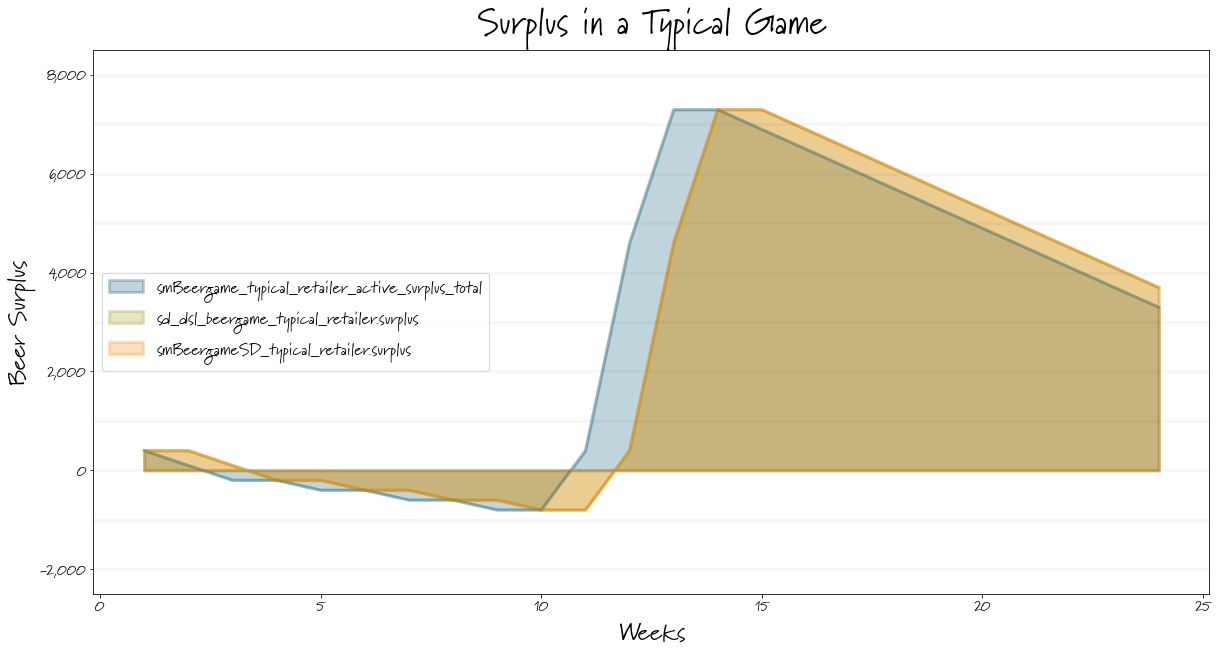

In [4]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD","sd_dsl_beergame","smBeergame"],
    kind="area",
    scenarios=["typical"],
    title="Surplus in a Typical Game",
    x_label="Weeks",
    y_label="Beer Surplus",
    equations=["retailer.surplus"],
     agents=["retailer"],
     agent_states=["active"],
    agent_properties=["surplus"],
    agent_property_types=["total"]
    
)

ERROR:root:Equation 'retailer.order_decision' not found!


2021-11-18 19:41:50.411725, [ERROR] No simulation model containing equation "retailer.orderDecision". Did you maybe mean one of "retailer.order_decision, brewery.order_decision, distributor.order_decision"?
2021-11-18 19:41:50.469536, [ERROR] No simulation model containing equation "retailer.order_decision". Did you maybe mean one of "retailer.orderDecision, wholesaler.orderDecision, retailer.order"?


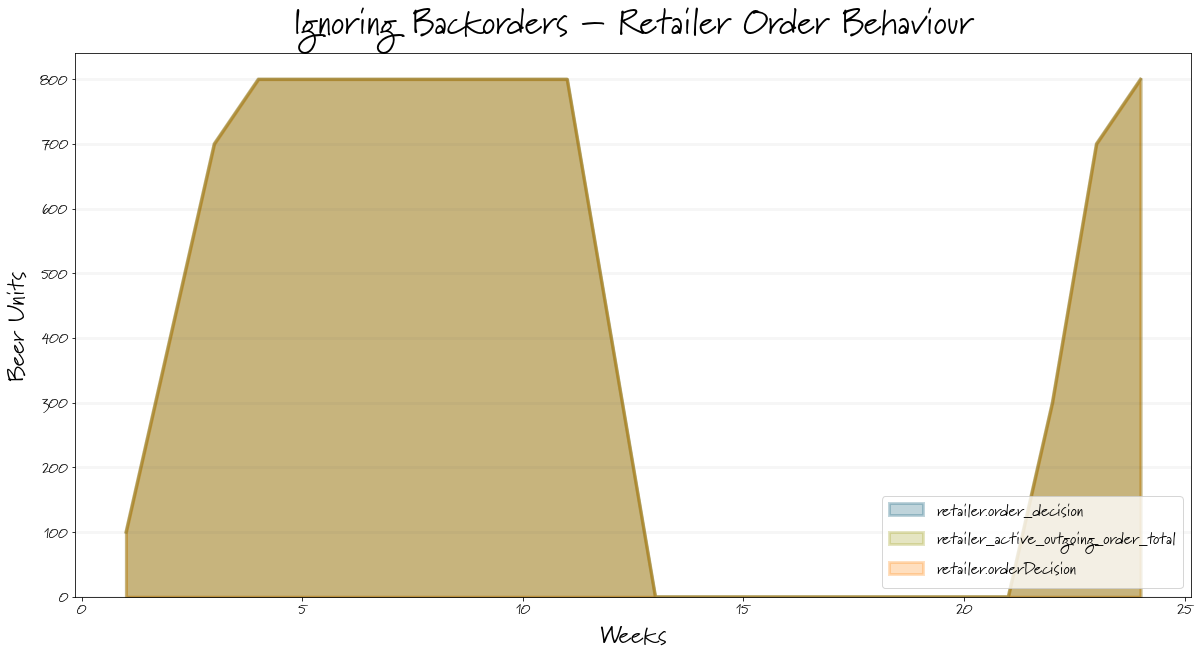

In [17]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD","sd_dsl_beergame","smSmartBeergame"],
    kind="area",
    scenarios=["ignoreBackorders","ignore_backorders","ignore_backorder"],
    title="Ignoring Backorders – Retailer Order Behaviour",
    x_label="Weeks",
    y_label="Beer Units",
    equations=["retailer.orderDecision","retailer.order_decision"],
     agents=["retailer"],
     agent_states=["active"],
    agent_properties=["outgoing_order"],
    agent_property_types=["total"]
    
)

ERROR:root:Equation 'performance_controlling.total_retailer_cost' not found!


2021-11-18 19:43:24.879447, [ERROR] No simulation model containing equation "performanceControlling.retailerCostAcc". Did you maybe mean one of "performance_controlling.retailer_cost, performance_controlling.wholesaler_cost, performance_controlling.retailer_inventory_cost"?
2021-11-18 19:43:24.979347, [ERROR] No simulation model containing equation "performance_controlling.total_retailer_cost". Did you maybe mean one of "performanceControlling.retailerCost, performanceControlling.wholesalerCost, performanceControlling.retailerCostAcc"?


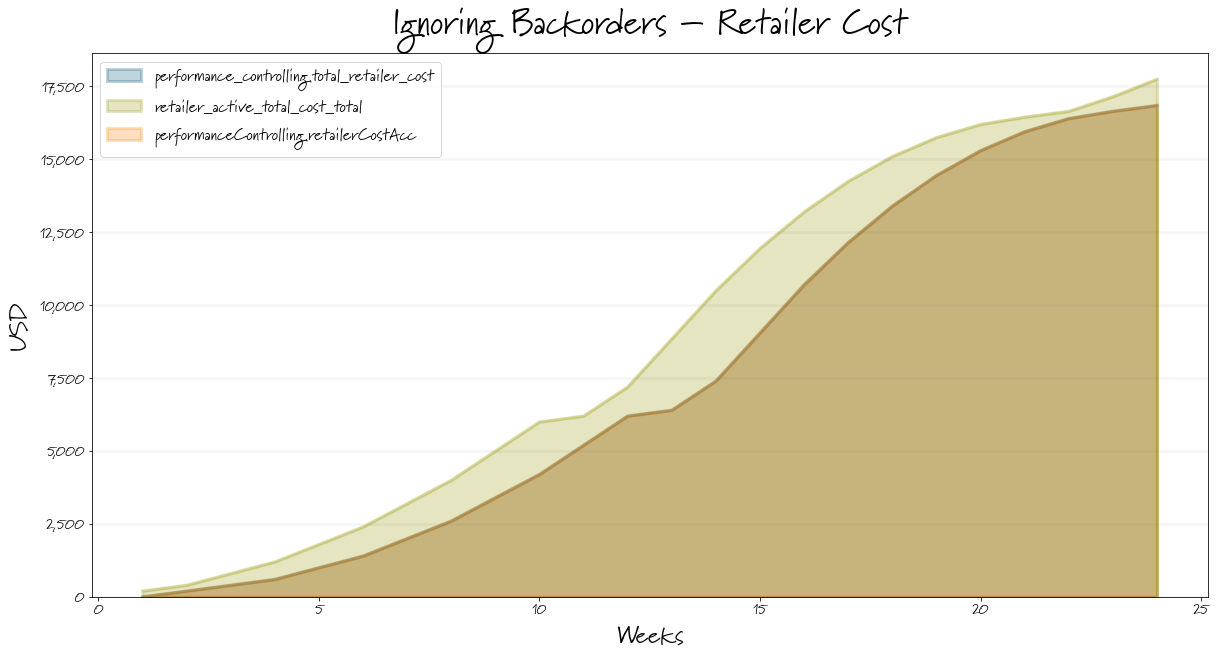

In [19]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD","sd_dsl_beergame","smSmartBeergame"],
    kind="area",
    scenarios=["ignoreBackorders","ignore_backorders","ignore_backorder"],
    title="Ignoring Backorders – Retailer Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performanceControlling.retailerCostAcc","performance_controlling.total_retailer_cost"],
    agents=["retailer"],
     agent_states=["active"],
    agent_properties=["total_cost"],
    agent_property_types=["total"]
)

So let’ s see what happens when the ordering policy takes open orders in to account.

ERROR:root:Equation 'retailer.order_decision' not found!


2021-11-18 19:44:47.754685, [ERROR] No simulation model containing equation "retailer.orderDecision". Did you maybe mean one of "retailer.order_decision, brewery.order_decision, distributor.order_decision"?
2021-11-18 19:44:47.812809, [ERROR] No simulation model containing equation "retailer.order_decision". Did you maybe mean one of "retailer.orderDecision, wholesaler.orderDecision, retailer.order"?


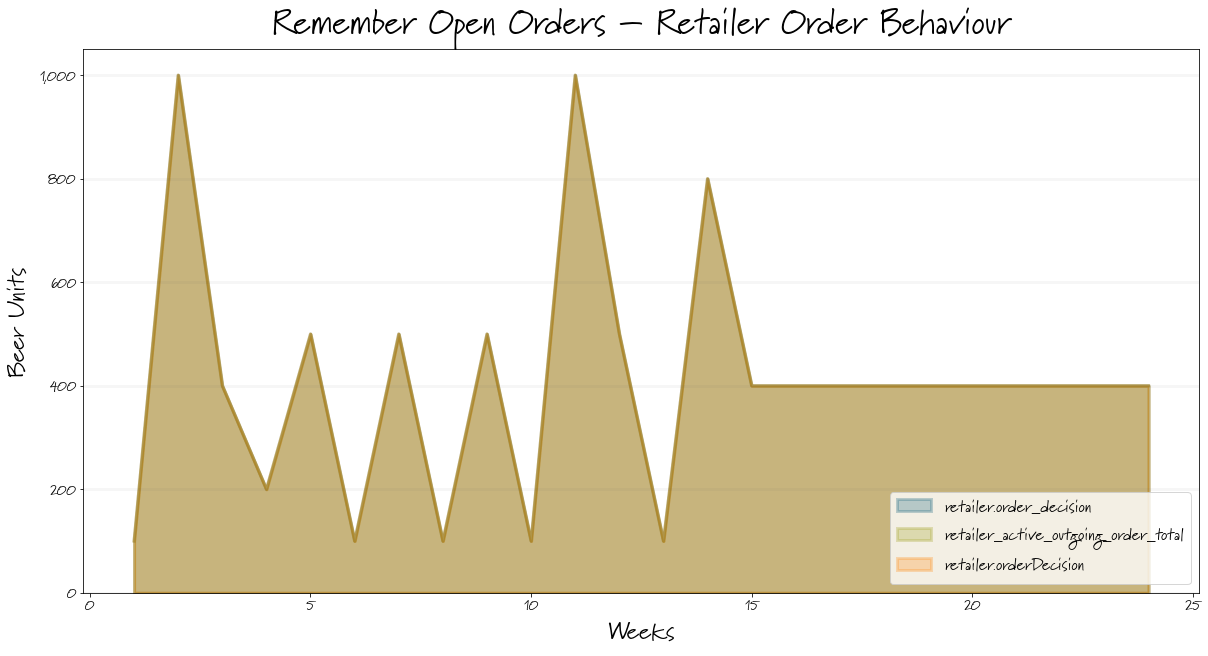

In [22]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD","sd_dsl_beergame","smSmartBeergame"],
    kind="area",
    scenarios=["includeSupplyLine","include_supply_line"],
    title="Remember Open Orders – Retailer Order Behaviour",
    x_label="Weeks",
    y_label="Beer Units",
    equations=["retailer.orderDecision","retailer.order_decision"],
     agents=["retailer"],
      agent_states=["active"],
    agent_properties=["outgoing_order"],
    agent_property_types=["total"]
    
)

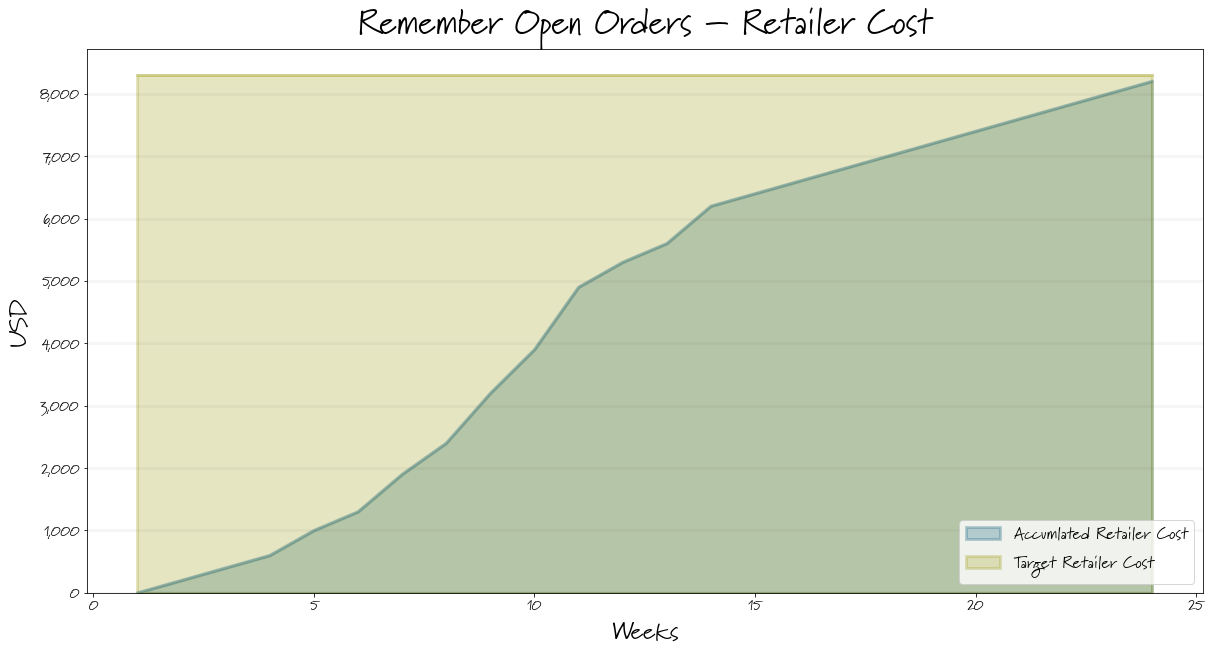

In [14]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["includeSupplyLine"],
    title="Remember Open Orders – Retailer Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performanceControlling.retailerCostAcc","policySettings.targetRetailerCost"],
    series_names={
        "smBeergameSD_includeSupplyLine_performanceControlling.retailerCostAcc" : "Accumlated Retailer Cost",
        "smBeergameSD_includeSupplyLine_policySettings.targetRetailerCost": "Target Retailer Cost"
    }
)

Our surplus is also looking good, we easily reach the surplus target:

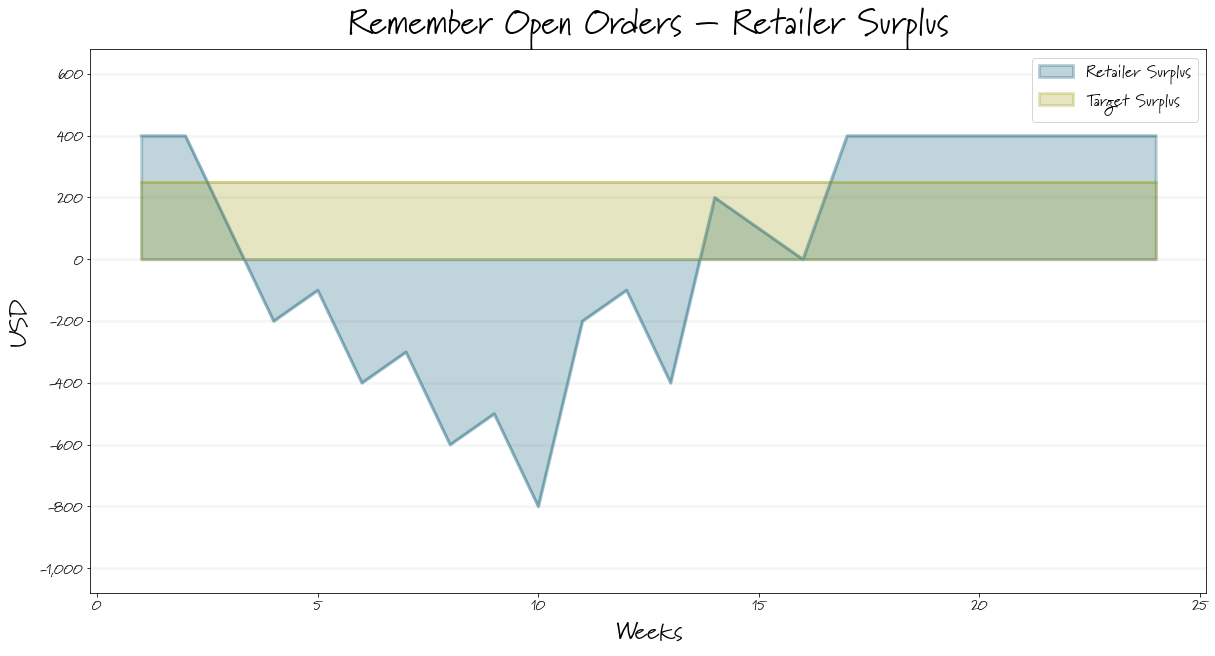

In [9]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["includeSupplyLine"],
    title="Remember Open Orders – Retailer Surplus",
    x_label="Weeks",
    y_label="USD",
    equations=["retailer.surplus","policySettings.targetSurplus"],
    series_names={
        "smBeergameSD_includeSupplyLine_retailer.surplus" : "Retailer Surplus",
        "smBeergameSD_includeSupplyLine_policySettings.targetSurplus": "Target Surplus"
    }
)

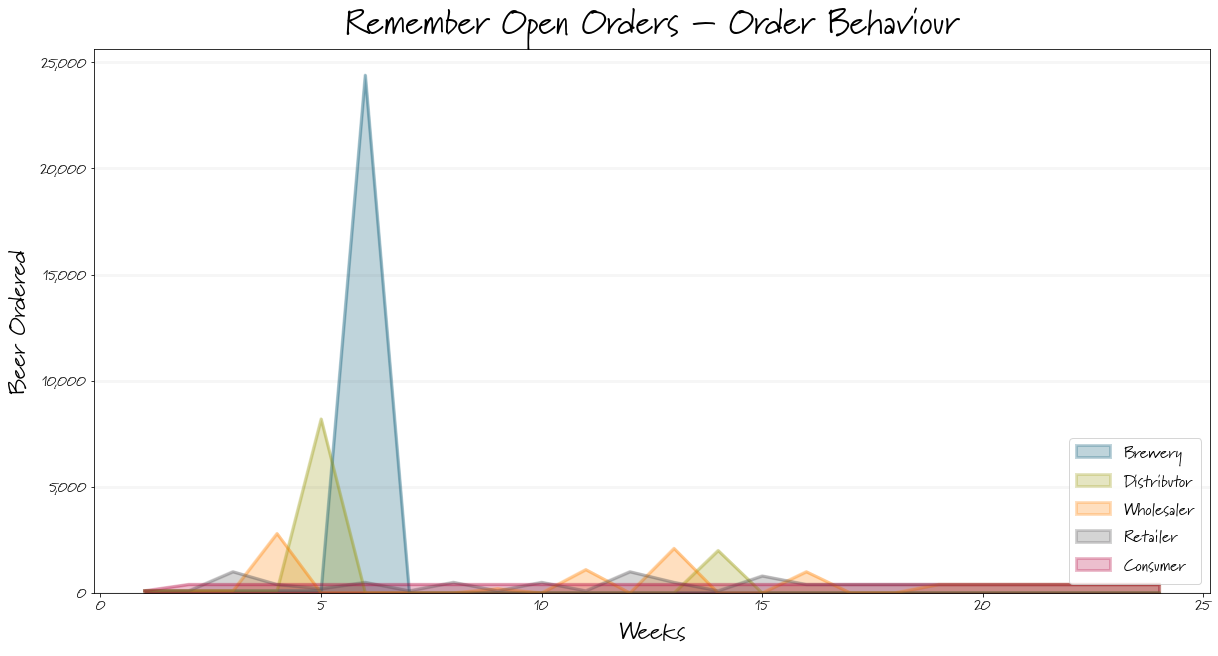

In [10]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["includeSupplyLine"],
    title="Remember Open Orders – Order Behaviour",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["brewery.actualProduction","distributor.actualOrder","wholesaler.actualOrder","retailer.actualOrder", "retailer.incomingOrder"],
    series_names={
        "smBeergameSD_includeSupplyLine_brewery.actualProduction" : "Brewery",
        "smBeergameSD_includeSupplyLine_distributor.actualOrder" : "Distributor",
        "smBeergameSD_includeSupplyLine_wholesaler.actualOrder": "Wholesaler",
        "smBeergameSD_includeSupplyLine_retailer.actualOrder": "Retailer",
        "smBeergameSD_includeSupplyLine_retailer.incomingOrder": "Consumer"
    }
)

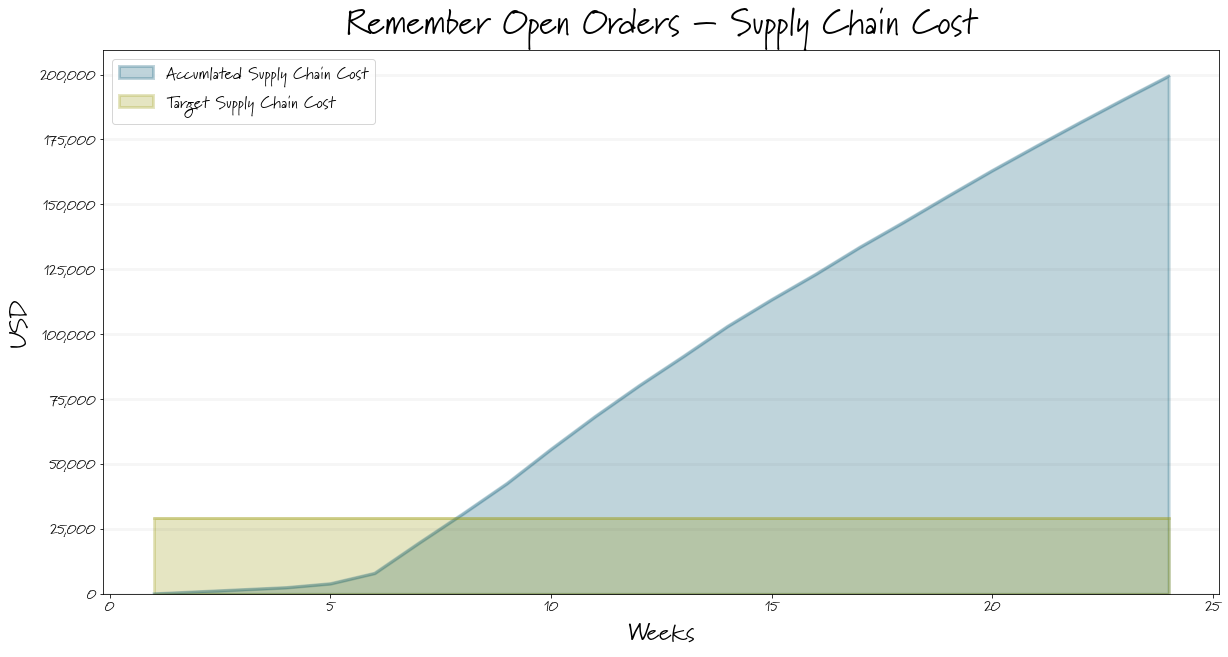

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["includeSupplyLine"],
    title="Remember Open Orders – Supply Chain Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performanceControlling.supplyChainCostAcc","policySettings.targetSupplyChainCost"],
    series_names={
        "smBeergameSD_includeSupplyLine_performanceControlling.supplyChainCostAcc" : "Accumlated Supply Chain Cost",
        "smBeergameSD_includeSupplyLine_policySettings.targetSupplyChainCost": "Target Supply Chain Cost"
    }
)

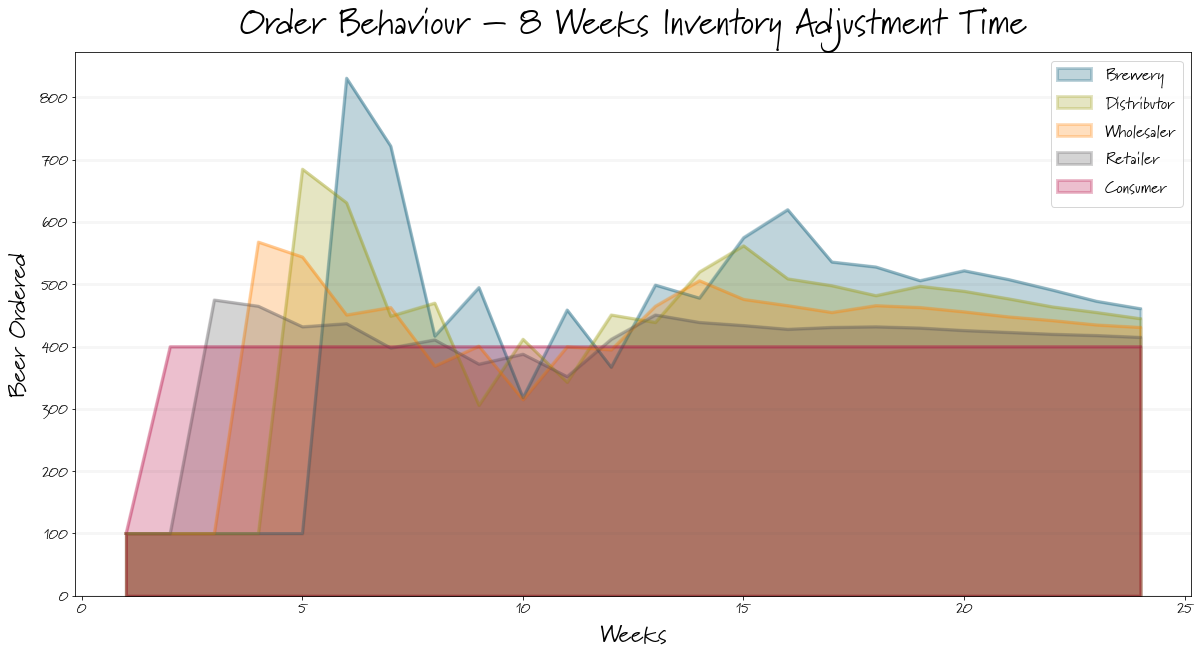

In [12]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["inventoryAdjustmentTime8"],
    title="Order Behaviour – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["brewery.actualProduction","distributor.actualOrder","wholesaler.actualOrder","retailer.actualOrder", "retailer.incomingOrder"],
    series_names={
        "smBeergameSD_inventoryAdjustmentTime8_brewery.actualProduction" : "Brewery",
        "smBeergameSD_inventoryAdjustmentTime8_distributor.actualOrder" : "Distributor",
        "smBeergameSD_inventoryAdjustmentTime8_wholesaler.actualOrder": "Wholesaler",
        "smBeergameSD_inventoryAdjustmentTime8_retailer.actualOrder": "Retailer",
        "smBeergameSD_inventoryAdjustmentTime8_retailer.incomingOrder": "Consumer"
    }
)

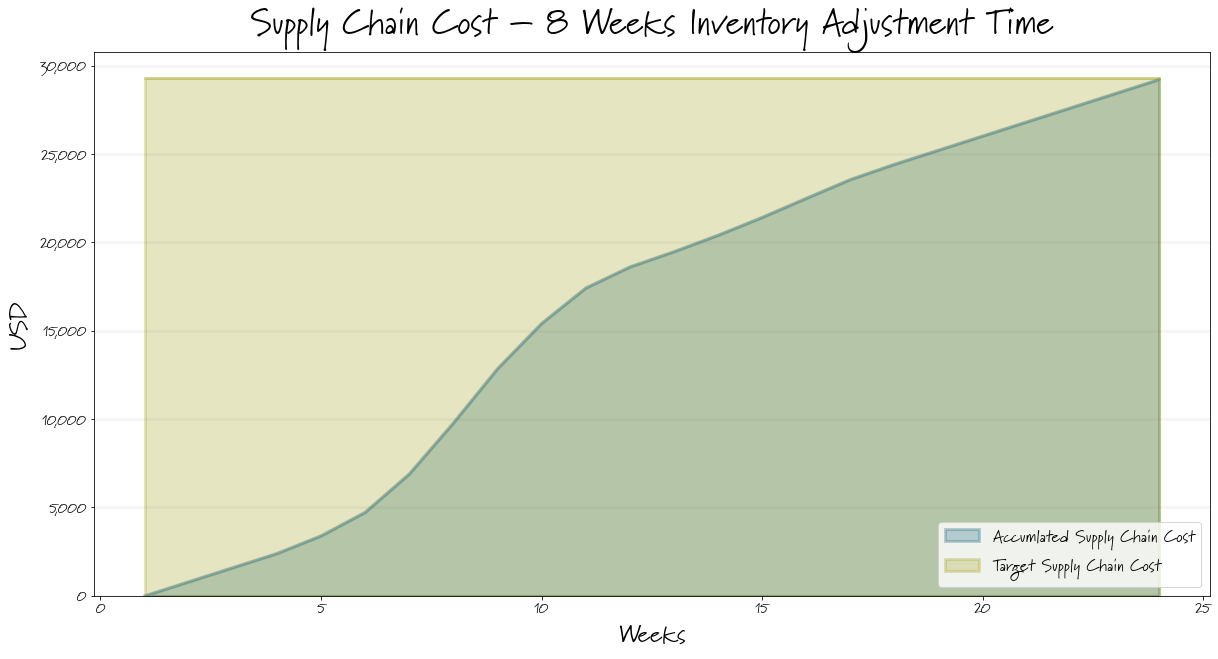

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["inventoryAdjustmentTime8"],
    title="Supply Chain Cost – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="USD",
    equations=["performanceControlling.supplyChainCostAcc","policySettings.targetSupplyChainCost"],
    series_names={
        "smBeergameSD_inventoryAdjustmentTime8_performanceControlling.supplyChainCostAcc" : "Accumlated Supply Chain Cost",
        "smBeergameSD_inventoryAdjustmentTime8_policySettings.targetSupplyChainCost": "Target Supply Chain Cost"
    }
)

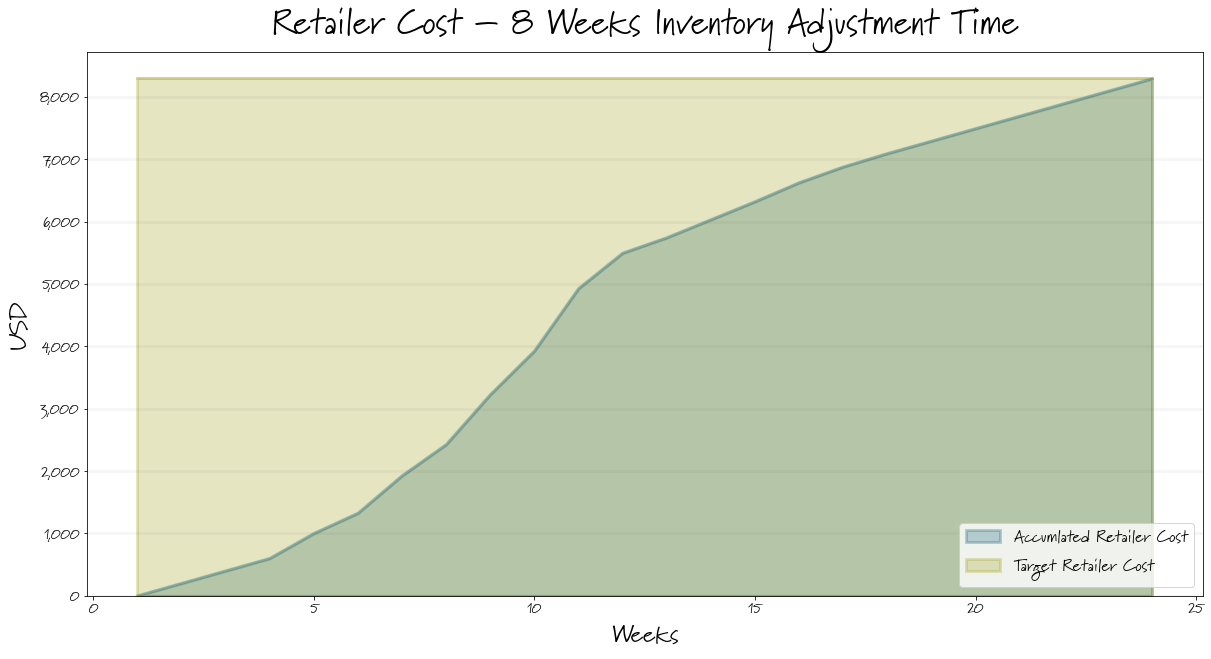

In [14]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["inventoryAdjustmentTime8"],
    title="Retailer Cost – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="USD",
    equations=["performanceControlling.retailerCostAcc","policySettings.targetRetailerCost"],
    series_names={
        "smBeergameSD_inventoryAdjustmentTime8_performanceControlling.retailerCostAcc" : "Accumlated Retailer Cost",
        "smBeergameSD_inventoryAdjustmentTime8_policySettings.targetRetailerCost": "Target Retailer Cost"
    }
)

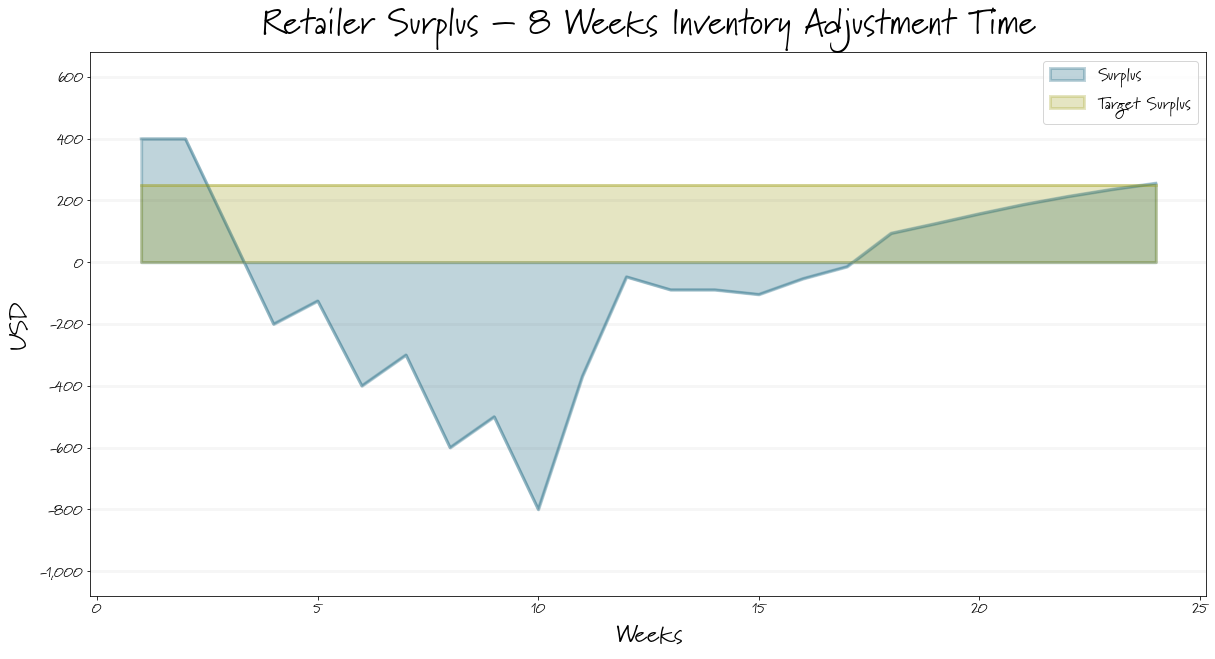

In [15]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["inventoryAdjustmentTime8"],
    title="Retailer Surplus – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="USD",
    equations=["retailer.surplus","policySettings.targetSurplus"],
    series_names={
        "smBeergameSD_inventoryAdjustmentTime8_retailer.surplus":"Surplus",
        "smBeergameSD_inventoryAdjustmentTime8_policySettings.targetSurplus":"Target Surplus"
    }
)

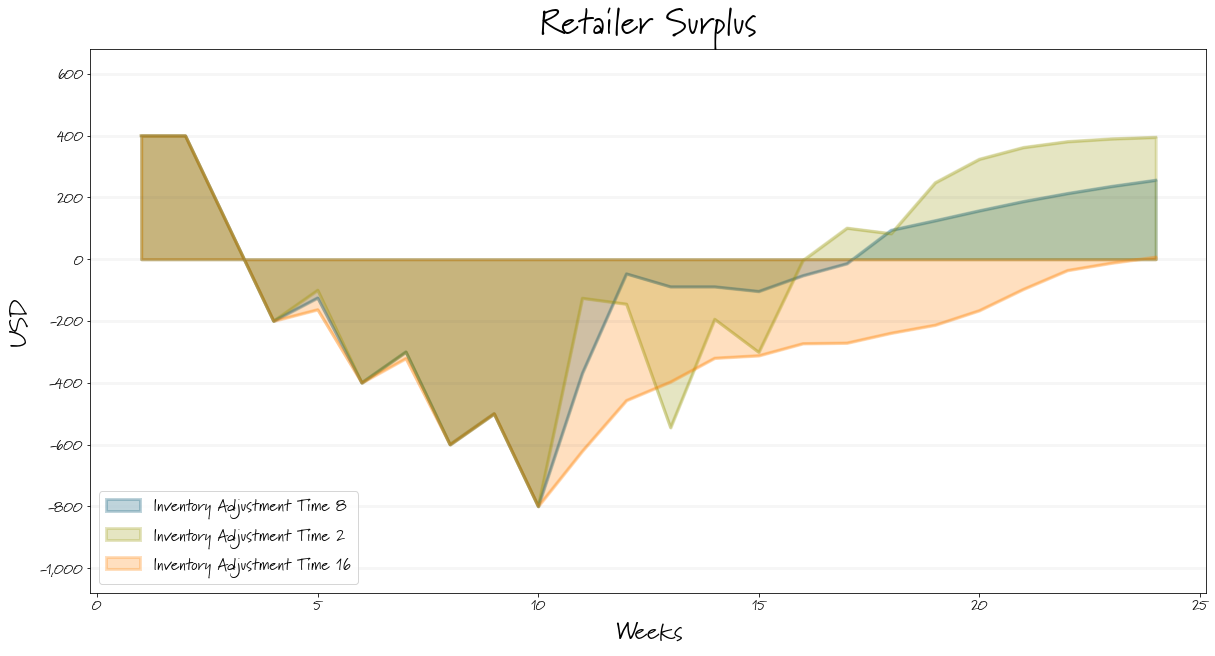

In [16]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["inventoryAdjustmentTime2","inventoryAdjustmentTime8","inventoryAdjustmentTime16"],
    title="Retailer Surplus",
    x_label="Weeks",
    y_label="USD",
    equations=["retailer.surplus"],
    series_names={
        "smBeergameSD_inventoryAdjustmentTime2_retailer.surplus":"Inventory Adjustment Time 2",
     "smBeergameSD_inventoryAdjustmentTime8_retailer.surplus":"Inventory Adjustment Time 8",
         "smBeergameSD_inventoryAdjustmentTime16_retailer.surplus":"Inventory Adjustment Time 16",
    }
    
)

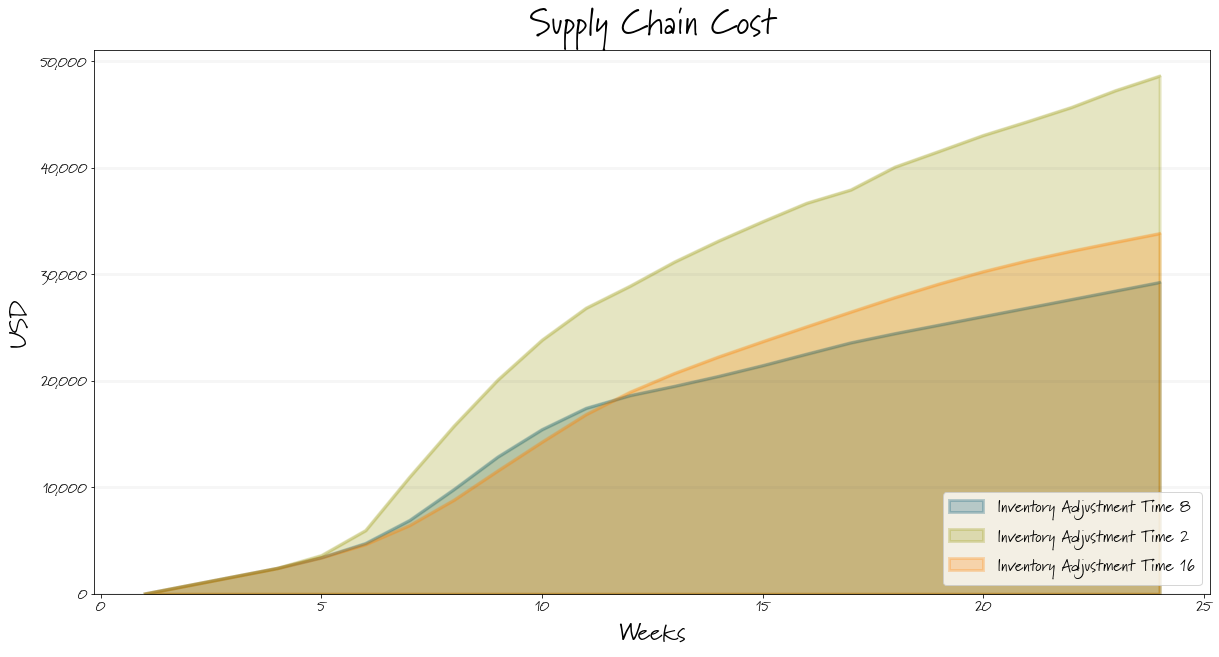

In [17]:
bptk.plot_scenarios(
    scenario_managers=["smBeergameSD"],
    kind="area",
    scenarios=["inventoryAdjustmentTime2","inventoryAdjustmentTime8","inventoryAdjustmentTime16"],
    title="Supply Chain Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performanceControlling.supplyChainCostAcc"],
    series_names={
        "smBeergameSD_inventoryAdjustmentTime2_performanceControlling.supplyChainCostAcc":"Inventory Adjustment Time 2",
     "smBeergameSD_inventoryAdjustmentTime8_performanceControlling.supplyChainCostAcc":"Inventory Adjustment Time 8",
         "smBeergameSD_inventoryAdjustmentTime16_performanceControlling.supplyChainCostAcc":"Inventory Adjustment Time 16",
    }
)

In [18]:
%run src/dashboard/beergame_dashboard_xmile.ipy

Our analysis of the supply chain also points to further improvement potential – the way the supply chain in the Beer Game is structured, each player only communicates orders to his immediate supplier in the chain, therefore it takes quite a long time to react to changes in customer demand.

Surely we could improve the performance of the supply chain, if the consumers demand for beer were communicated to all players in the chain directly?

So instead of just taking a local view of each players behavior we could take a global view of the entire supply chain; instead of just improving each players ordering policy we should change the architecture of the entire supply chain.

Needless to say that this is what actually happened in the “real world”, we just need to look at just-in-time production and lean manufacturing (and let’s not forget that the beer game was developed in the 1950s, before these revolutions took place).

Though these ideas are very exciting, I feel we have achieved enough for now and will therefore leave a detailed investigation of these ideas to a future post.